# `Business case: Delhivery`

# About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

## Column Profiling:

data - tells whether the data is testing or training data

trip_creation_time – Timestamp of trip creation

route_schedule_uuid – Unique Id for a particular route schedule

route_type – Transportation type

FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

Carting: Handling system consisting of small vehicles (carts)

trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

source_center - Source ID of trip origin

source_name - Source Name of trip origin

destination_cente – Destination ID

destination_name – Destination Name

od_start_time – Trip start time

od_end_time – Trip end time

start_scan_to_end_scan – Time taken to deliver from source to destination

is_cutoff – Unknown field

cutoff_factor – Unknown field

cutoff_timestamp – Unknown field

actual_distance_to_destination – Distance in Kms between source and destination warehouse

actual_time – Actual time taken to complete the delivery (Cumulative)

osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

factor – Unknown field

segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

segment_factor – Unknown field

In [2]:
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np 
from numpy.random import seed
from numpy.random import randint
from numpy import mean
import datetime as dt 
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


In [3]:
URL = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181'
df= pd.read_csv(URL)

In [4]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
df.shape

(144867, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

The dataset(before transformation) has about 12 columns of objects, 10 columns of float values, 1 column of integers and lastly one column consisitng of boolean values.

In [7]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


*__Observations:__*

- Clearly, integer & floating value columns have no null values.

- All the columns here have large values of outliers.

In [8]:
df.describe(include='object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-19 04:07:34.091798,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [9]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [10]:
for col in df:
    print(f'Number of unique values in the {col} column:',df[col].nunique(),'.')

Number of unique values in the data column: 2 .
Number of unique values in the trip_creation_time column: 14817 .
Number of unique values in the route_schedule_uuid column: 1504 .
Number of unique values in the route_type column: 2 .
Number of unique values in the trip_uuid column: 14817 .
Number of unique values in the source_center column: 1508 .
Number of unique values in the source_name column: 1498 .
Number of unique values in the destination_center column: 1481 .
Number of unique values in the destination_name column: 1468 .
Number of unique values in the od_start_time column: 26369 .
Number of unique values in the od_end_time column: 26369 .
Number of unique values in the start_scan_to_end_scan column: 1915 .
Number of unique values in the is_cutoff column: 2 .
Number of unique values in the cutoff_factor column: 501 .
Number of unique values in the cutoff_timestamp column: 93180 .
Number of unique values in the actual_distance_to_destination column: 144515 .
Number of unique va

*__Observations__*:

    - Here we notice the columns data,route_type and is_cutoff consists of catagorical information where is_cutoff contains boolean values.

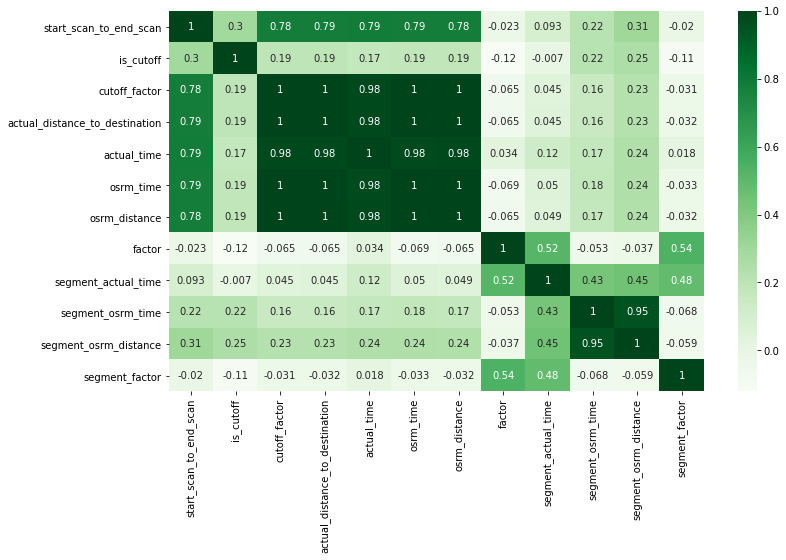

In [11]:
df_cor = df.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(df_cor,annot=True, cmap='Greens')
plt.show()

In [12]:
df1 = df.copy(deep=True)

In [13]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

#### Data Transformation

In [14]:
# converting columns' datatypes as category
df['data'] = df['data'].astype('category')

df['route_type'] = df['route_type'].astype('category')

df['is_cutoff'] = df['is_cutoff'].astype('category')


In [ ]:
# missing values and missing values treatment

In [15]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

*__Observations:__*

- Only two columns source_name  and destination_name have missing values that is about 0.03 per cent of the data.

In [ ]:
# converting objects datatypes to datetime format

In [16]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'], errors='coerce')
df['od_end_time'] = pd.to_datetime(df['od_end_time'], errors='coerce')
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])

In [ ]:
# checking for duplicate values

In [17]:
print('The number of duplicated values in the dataset are ',len(df[df.duplicated()]))

The number of duplicated values in the dataset are  0


In [ ]:
# Destination Name: Split and extract features out of destination. City-place-code (State)
# Source Name: Split and extract features out of destination. City-place-code (State)

In [18]:
df['source_city'] = df["source_name"].str.extract(r'([^_]+)')
# source city
df['source_place'] = df["source_name"].str.split("_", n = 2, expand = True)[1]
# source place
df['source_code'] = (df["source_name"].str.split("_",n=2,expand = True)[2]).str.split(" ",n = 1, expand = True)[0]
# source code 
df['source_state'] = df["source_name"].str.extract(r'.*\((.*)\).*')
#  source state
df['destination_city']= df["destination_name"].str.extract(r'([^_]+)')
# destination city
df['destination_place'] = df["destination_name"].str.split("_", n = 2, expand = True)[1]
# destination place
df['destination_code'] = (df["destination_name"].str.split("_",n=2,expand = True)[2]).str.split(" ",n = 1, expand = True)[0]
# destination code 
df['destination_state'] = df["destination_name"].str.extract(r'.*\((.*)\).*')
# destination state

In [19]:
pd.set_option('display.max_columns', None)
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20.000000,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,Sonipat,Kundli,H,Haryana,Gurgaon,Bilaspur,HB,Haryana
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18.000000,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,Sonipat,Kundli,H,Haryana,Gurgaon,Bilaspur,HB,Haryana
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18.000000,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,Sonipat,Kundli,H,Haryana,Gurgaon,Bilaspur,HB,Haryana
144865,training,2018-09-20 16:24:28.436231,thanos::srout

In [20]:
# creating a new column to save the time taken from order taken to order received
df['od_duration_in_hrs'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600
# converting minutes into hours
df['start_scan_to_end_scan'] = df['start_scan_to_end_scan']/60
# Trip_creation_time: Extract features like month, year and day.
df['trip_creation_month'] = df['trip_creation_time'].dt.month_name()
df['trip_creation_year'] = df['trip_creation_time'].dt.year
df['trip_creation_year'] = df['trip_creation_time'].dt.day

In [21]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,od_duration_in_hrs,trip_creation_month,trip_creation_year
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat,1.436894,September,20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat,1.436894,September,20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat,1.436894,September,20
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat,1.436894,September,20
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat,1.436894,September,20


In [22]:
# dropping unknown columns from the dataset
df.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1,inplace=True)

In [23]:
print('Number of columns in the dataset after creating new columns and dropping some columns: ',df.shape[1])

Number of columns in the dataset after creating new columns and dropping some columns:  30


In [24]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,od_duration_in_hrs,trip_creation_month,trip_creation_year
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat,1.436894,September,20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat,1.436894,September,20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat,1.436894,September,20
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat,1.436894,September,20
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat,1.436894,September,20


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [26]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_duration_in_hrs,trip_creation_year
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000,144867.000000
mean,16.021050,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902,16.029317,18.389723
std,17.283546,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066,17.283544,7.878764
min,0.333333,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000,0.345047,1.000000
25%,2.683333,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010,2.691688,14.000000
50%,7.483333,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300,7.487276,19.000000
75%,27.233333,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325,27.249169,25.000000
max,131.633333,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370,131.642533,30.000000


In [27]:
df.describe(include='object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,trip_creation_month
count,144867,144867,144867,144574,144867,144606,144574,142467,129924,144574,144606,142165,129038,144606,144867
unique,1504,14817,1508,1498,1481,1468,1262,1178,48,31,1258,1154,48,32,2
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,H,Karnataka,September
freq,1812,101,23347,23347,15192,15192,23665,23464,41177,27499,15393,15363,34584,21065,127349


####  ------------------------------------------------------------Data Transformation Ends-----------------------------------------------------------------------

## --------------------------------------------------Outlier in Dataset--------------------------------------------------¶

Text(0.5, 1.0, 'Boxplot of the column (actual_time)')

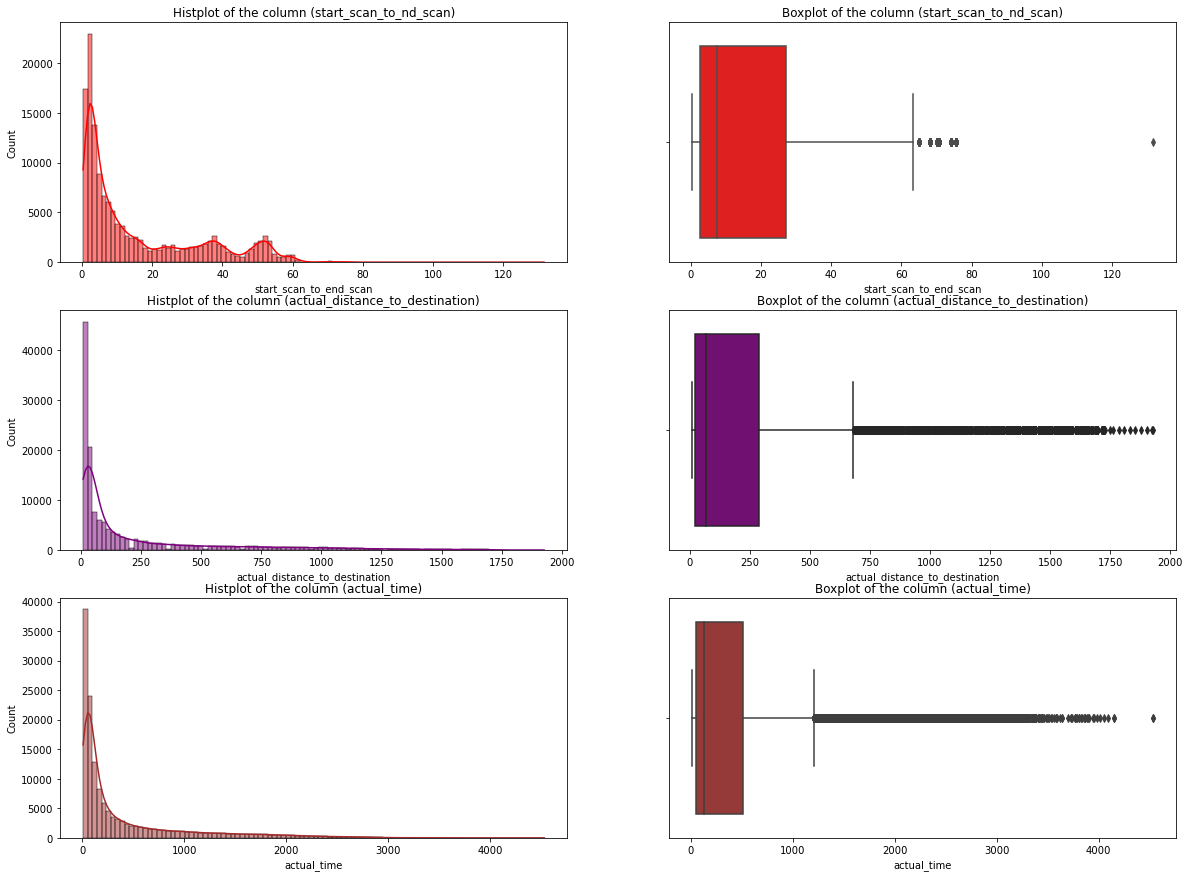

In [28]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(321)
sns.histplot(df['start_scan_to_end_scan'], bins=100, kde=True,color='r')
plt.title('Histplot of the column (start_scan_to_nd_scan)')

ax = fig.add_subplot(322)
sns.boxplot(df['start_scan_to_end_scan'],color='r')
plt.title('Boxplot of the column (start_scan_to_nd_scan)')

ax = fig.add_subplot(323)
sns.histplot(df['actual_distance_to_destination'], bins=100, kde=True,color='purple')
plt.title('Histplot of the column (actual_distance_to_destination)')

ax = fig.add_subplot(324)
sns.boxplot(df['actual_distance_to_destination'],color='purple')
plt.title('Boxplot of the column (actual_distance_to_destination)')

ax = fig.add_subplot(325)
sns.histplot(df['actual_time'], bins=100, kde=True,color='brown')
plt.title('Histplot of the column (actual_time)')

ax = fig.add_subplot(326)
sns.boxplot(df['actual_time'],color='brown')
plt.title('Boxplot of the column (actual_time)')


Text(0.5, 1.0, 'Boxplot of the column (osrm_distance)')

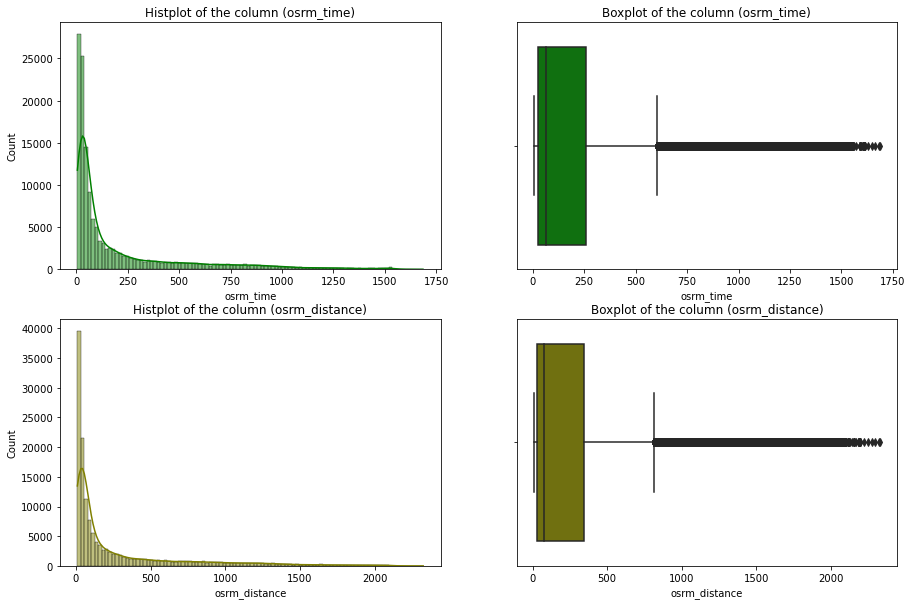

In [29]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
sns.histplot(df['osrm_time'], bins=100, kde=True,color='green')
plt.title('Histplot of the column (osrm_time)')

ax = fig.add_subplot(222)
sns.boxplot(df['osrm_time'],color='green')
plt.title('Boxplot of the column (osrm_time)')

ax = fig.add_subplot(223)
sns.histplot(df['osrm_distance'], bins=100, kde=True,color='olive')
plt.title('Histplot of the column (osrm_distance)')

ax = fig.add_subplot(224)
sns.boxplot(df['osrm_distance'],color='olive')
plt.title('Boxplot of the column (osrm_distance)')

In the dataset, most of the outliers can be seen in these three columns:
1) start_scan_to_end_scan

2) actual_distance

3) osrm_distance

4) osrm_time

5) actual_time

Ways to deal with outliers:

Outliers are dealth according to the nature of the dataset.

a) use IQR to remove outliers from the data.

b) transforming the data into lognormal as the data is right skewed.

In [30]:
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,od_duration_in_hrs,trip_creation_month,trip_creation_year
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat,1.436894,September,20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat,1.436894,September,20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.433333,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat,1.436894,September,20


In [31]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'source_city',
       'source_place', 'source_code', 'source_state', 'destination_city',
       'destination_place', 'destination_code', 'destination_state',
       'od_duration_in_hrs', 'trip_creation_month', 'trip_creation_year'],
      dtype='object')

# -------------------------------------------Hypothesis Testing-------------------------------------------

## Hypothesis 1:

###  Statement: Compare the difference between Point a. and start_scan_to_end_scan. 

In [32]:
hypo_1_1 =pd.DataFrame(df.groupby('trip_uuid')['start_scan_to_end_scan'].unique().apply(sum).reset_index())
hypo_1_1

,trip_uuid,start_scan_to_end_scan
0,trip-153671041653548748,37.650000
1,trip-153671042288605164,3.000000
2,trip-153671043369099517,65.550000
3,trip-153671046011330457,1.666667
4,trip-153671052974046625,11.950000
...,...,...
14812,trip-153861095625827784,4.283333
14813,trip-153861104386292051,1.000000
14814,trip-153861106442901555,7.016667
14815,trip-153861115439069069,5.783333


In [33]:
hypo_1_2 = pd.DataFrame(df.groupby('trip_uuid')['od_duration_in_hrs'].unique().apply(sum).reset_index())
hypo_1_2

,trip_uuid,od_duration_in_hrs
0,trip-153671041653548748,37.668497
1,trip-153671042288605164,3.026865
2,trip-153671043369099517,65.572709
3,trip-153671046011330457,1.674916
4,trip-153671052974046625,11.972484
...,...,...
14812,trip-153861095625827784,4.300482
14813,trip-153861104386292051,1.009842
14814,trip-153861106442901555,7.035331
14815,trip-153861115439069069,5.808548


In [34]:
hypo_1= hypo_1_1.start_scan_to_end_scan.
hypo_2 = hypo_1_2.od_duration_in_hrs.
hypo_1_1_log = np.log(hypo1)
hypo_1_2_log = np.log(hypo_2)
# np_array = series.to_numpy()

SyntaxError: invalid syntax (<ipython-input-34-1afb28eda79a>, line 1)

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
sns.histplot(hypo_1_1_log, bins=100, kde=True,color='green')
plt.title('Histplot of (log(start_scan_to_end_scan))')

ax = fig.add_subplot(222)
stats.probplot(hypo_1_1_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(start_scan_to_end_scan))')

ax = fig.add_subplot(223)
sns.histplot(hypo_1_2_log, bins=100, kde=True,color='green')
plt.title('Histplot of (log(od_duration_in_hrs))')

ax = fig.add_subplot(224)
stats.probplot(hypo_1_2_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(od_duration_in_hrs))')

__Step 1: Defining the null and Altenate Hypothesis__

H0: start_scan_to_end_scan and od_duration_in_hrs have the same mean.

H1: start_scan_to_end_scan and od_duration_in_hrs does not have the same mean

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the

appropriate test for this problem.


In [35]:
a = df['start_scan_to_end_scan'].sample(1000)
b = df['od_duration_in_hrs'].sample(10000)
print('The standard deviation of the sample of start_scan_to_end_scan is',a.std(),'.')
print('The standard deviation of the sample of od_duration_in_hrs is',b.std(),'.')

The standard deviation of the sample of start_scan_to_end_scan is 17.14904662381152 .
The standard deviation of the sample of od_duration_in_hrs is 17.373591604349325 .


__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.5.

__Step 4: Calculating the p_value__

In [36]:
hypo1 = hypo_1_1.start_scan_to_end_scan
hypo2 = hypo_1_2.od_duration_in_hrs

In [37]:
for i in range(5):
    print(stats.ttest_ind(np.log(hypo1).sample(10000),np.log(hypo2).sample(10000)))
    print()


Ttest_indResult(statistic=-0.3322660593092181, pvalue=0.7396918485840385)

Ttest_indResult(statistic=-0.20539329588537997, pvalue=0.8372669482887076)

Ttest_indResult(statistic=0.21391637636690866, pvalue=0.8306144501996713)

Ttest_indResult(statistic=-0.9106865497435837, pvalue=0.3624715294567291)

Ttest_indResult(statistic=-0.2943991910055872, pvalue=0.7684559406763165)



__Step 5: Conclussion__

Multiple t-tests have been done, as observed, p_value > the alpha or significance value.

Hence, we fail to reject the null Hypothesis.

## Hypothesis 2
### Statement: Hypothesis Testing on actual_time aggregated value and OSRM time aggregated value 

In [38]:
hypo_2_1 =pd.DataFrame(df.groupby(['trip_uuid','od_duration_in_hrs'])['actual_time'].max().reset_index())
hypo_2_1.head(4)

,trip_uuid,od_duration_in_hrs,actual_time
0,trip-153671041653548748,16.658423,830.0
1,trip-153671041653548748,21.010074,732.0
2,trip-153671042288605164,0.980540,47.0
3,trip-153671042288605164,2.046325,96.0


In [39]:
main_actual = pd.DataFrame(hypo_2_1.groupby('trip_uuid')['actual_time'].sum().reset_index())
main_actual.head(5)

,trip_uuid,actual_time
0,trip-153671041653548748,1562.0
1,trip-153671042288605164,143.0
2,trip-153671043369099517,3347.0
3,trip-153671046011330457,59.0
4,trip-153671052974046625,341.0


In [40]:
hypo_2_2 =pd.DataFrame(df.groupby(['trip_uuid','od_duration_in_hrs'])['osrm_time'].max().reset_index())
hypo_2_2.head(4)

,trip_uuid,od_duration_in_hrs,osrm_time
0,trip-153671041653548748,16.658423,394.0
1,trip-153671041653548748,21.010074,349.0
2,trip-153671042288605164,0.980540,26.0
3,trip-153671042288605164,2.046325,42.0


In [41]:
main_osrm = pd.DataFrame(hypo_2_2.groupby('trip_uuid')['osrm_time'].sum().reset_index())
main_osrm.head(4)

,trip_uuid,osrm_time
0,trip-153671041653548748,743.0
1,trip-153671042288605164,68.0
2,trip-153671043369099517,1741.0
3,trip-153671046011330457,15.0


In [42]:
hypo_3 = main_actual.actual_time
hypo_4 = main_osrm.osrm_time
hypo_2_1_log = np.log(hypo_3)
hypo_2_2_log = np.log(hypo_4)

Text(0.5, 1.0, 'QQPlot of (log(osrm_time))')

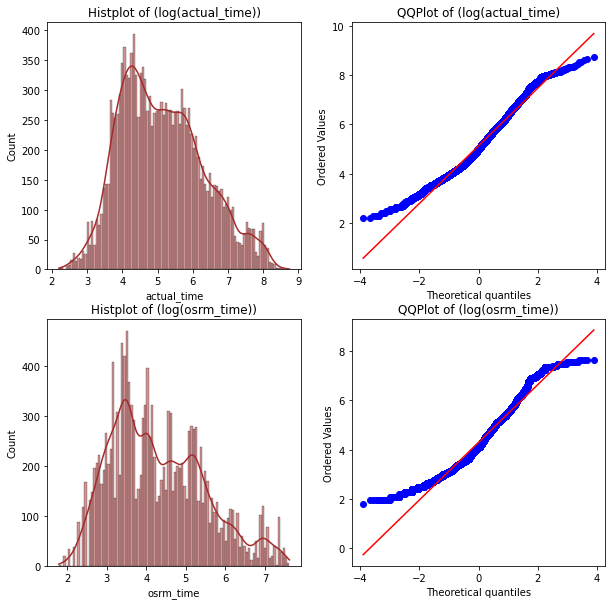

In [43]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
sns.histplot(hypo_2_1_log, bins=100, kde=True,color='brown')
plt.title('Histplot of (log(actual_time))')

ax = fig.add_subplot(222)
stats.probplot(hypo_2_1_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(actual_time)')

ax = fig.add_subplot(223)
sns.histplot(hypo_2_2_log, bins=100, kde=True,color='brown')
plt.title('Histplot of (log(osrm_time))')

ax = fig.add_subplot(224)
stats.probplot(hypo_2_2_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(osrm_time))')

__Step 1: Defining the null and Altenate Hypothesis__

H0: actual_time and osrm_time have the same mean.

H1: actual_time and osrm_time does not have the same mean.

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the

appropriate test for this problem.

Also performing a kruksal test that is a non-parametric method for testing whether samples originate from the same distribution.


In [44]:
a = main_actual['actual_time'].sample(1000)
b = main_osrm['osrm_time'].sample(10000)
print('The standard deviation of the sample of actual_time sample is',a.std(),'.')
print('The standard deviation of the sample of osrm_time sample is',b.std(),'.')

The standard deviation of the sample of actual_time sample is 587.767269203336 .
The standard deviation of the sample of osrm_time sample is 278.12463479276386 .


__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.5.

__Step 4: Calculating the p_value__

In [45]:
for i in range(5):
    print(stats.ttest_ind(hypo_2_1_log.sample(5000),hypo_2_2_log.sample(5000)))
    print()

Ttest_indResult(statistic=33.541485704246256, pvalue=7.85777348047146e-234)

Ttest_indResult(statistic=36.1262169185518, pvalue=1.0019185715580235e-268)

Ttest_indResult(statistic=34.918560265367304, pvalue=3.600270925691249e-252)

Ttest_indResult(statistic=34.37254909977586, pvalue=7.893810558714878e-245)

Ttest_indResult(statistic=35.8786408368575, pvalue=2.69293301493571e-265)



In [46]:
result = stats.kruskal(hypo_2_1_log.sample(5000),hypo_2_2_log.sample(5000))
result

KruskalResult(statistic=1195.950660738194, pvalue=4.6273756283960507e-262)

__Step 5: Conclussion__

Multiple t-tests have been done, as observed, p_value < the alpha or significance value.

Also, p_value of kurksal test < the alpha or significance value.

Hence, we fail to accept the null Hypothesis.

## Hypothesis 3
### Statement: HypothesisTesting between actual_time aggregated value and segment actual time aggregated value 

__Step 1: Defining the null and Altenate Hypothesis__

H0: actual_time and osrm_time have the same mean.

H1: actual_time and osrm_time does not have the same mean.

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the

appropriate test for this problem.

In [47]:
act_time =pd.DataFrame(df.groupby(['trip_uuid','od_duration_in_hrs'])['actual_time'].max().reset_index())
hypo_3_1 = pd.DataFrame(act_time.groupby('trip_uuid')['actual_time'].sum().reset_index())
hypo_3_1.head(5)

,trip_uuid,actual_time
0,trip-153671041653548748,1562.0
1,trip-153671042288605164,143.0
2,trip-153671043369099517,3347.0
3,trip-153671046011330457,59.0
4,trip-153671052974046625,341.0


In [48]:
seg_time = pd.DataFrame(df.groupby(['trip_uuid','od_duration_in_hrs'])['segment_actual_time'].sum().reset_index())
seg_time.head(5)

,trip_uuid,od_duration_in_hrs,segment_actual_time
0,trip-153671041653548748,16.658423,820.0
1,trip-153671041653548748,21.010074,728.0
2,trip-153671042288605164,0.980540,46.0
3,trip-153671042288605164,2.046325,95.0
4,trip-153671043369099517,13.910649,608.0


In [49]:
hypo_3_2 = pd.DataFrame(seg_time.groupby('trip_uuid')['segment_actual_time'].sum().reset_index())
hypo_3_2

,trip_uuid,segment_actual_time
0,trip-153671041653548748,1548.0
1,trip-153671042288605164,141.0
2,trip-153671043369099517,3308.0
3,trip-153671046011330457,59.0
4,trip-153671052974046625,340.0
...,...,...
14812,trip-153861095625827784,82.0
14813,trip-153861104386292051,21.0
14814,trip-153861106442901555,281.0
14815,trip-153861115439069069,258.0


In [50]:
hypo_5 = hypo_3_1.actual_time
hypo_6 = hypo_3_2.segment_actual_time
hypo_3_1_log = np.log(hypo_5)
hypo_3_2_log = np.log(hypo_6)

Text(0.5, 1.0, 'QQPlot of (log(segment_actual_time))')

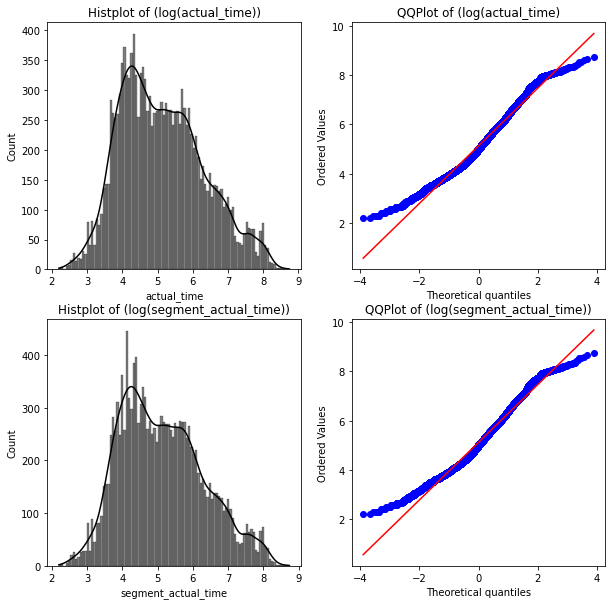

In [51]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
sns.histplot(hypo_3_1_log, bins=100, kde=True,color='black')
plt.title('Histplot of (log(actual_time))')

ax = fig.add_subplot(222)
stats.probplot(hypo_3_1_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(actual_time)')

ax = fig.add_subplot(223)
sns.histplot(hypo_3_2_log, bins=100, kde=True,color='black')
plt.title('Histplot of (log(segment_actual_time))')

ax = fig.add_subplot(224)
stats.probplot(hypo_3_2_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(segment_actual_time))')

__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.5.

__Step 4: Calculating the p_value__

In [52]:
for i in range(5):
    print(stats.ttest_ind(hypo_3_1_log.sample(5000),hypo_3_2_log.sample(5000)))
    print()

Ttest_indResult(statistic=-0.30831582410718117, pvalue=0.7578484494786436)

Ttest_indResult(statistic=0.18140738489118863, pvalue=0.8560515000705342)

Ttest_indResult(statistic=1.6736694549579336, pvalue=0.09422686134806937)

Ttest_indResult(statistic=0.6264878227742676, pvalue=0.5310093248853642)

Ttest_indResult(statistic=0.31733513298853744, pvalue=0.7509959481003989)



In [53]:
result = stats.kruskal(hypo_3_1_log.sample(5000),hypo_3_2_log.sample(5000))
result

KruskalResult(statistic=4.340811324006057, pvalue=0.03720918838776242)

__Step 5: Conclusion__

Multiple t-tests have been done, as observed, p_value > the alpha or significance value.

Also, p_value of kurksal test > the alpha or significance value.

Hence, we fail to reject the null Hypothesis.

## Hypothesis 4
### Statement: HypothesisTesting between osrm distance aggregated value and segment osrm distance aggregated value

__Step 1: Defining the null and Altenate Hypothesis__

H0: actual_time and osrm_time have the same mean.

H1: actual_time and osrm_time does not have the same mean.

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the

appropriate test for this problem.

In [54]:
om_dist =pd.DataFrame(df.groupby(['trip_uuid','od_duration_in_hrs'])['osrm_distance'].max().reset_index())
om_dist.head(4)

,trip_uuid,od_duration_in_hrs,osrm_distance
0,trip-153671041653548748,16.658423,544.8027
1,trip-153671041653548748,21.010074,446.5496
2,trip-153671042288605164,0.980540,28.1994
3,trip-153671042288605164,2.046325,56.9116


In [55]:
hypo_4_1= pd.DataFrame(om_dist.groupby('trip_uuid')['osrm_distance'].sum().reset_index())
hypo_4_1.head(5)

,trip_uuid,osrm_distance
0,trip-153671041653548748,991.3523
1,trip-153671042288605164,85.1110
2,trip-153671043369099517,2372.0852
3,trip-153671046011330457,19.6800
4,trip-153671052974046625,146.7918


In [56]:
hypo_4_2 = pd.DataFrame(df.groupby('trip_uuid')['segment_osrm_distance'].sum().reset_index())
hypo_4_2.head(5) 

,trip_uuid,segment_osrm_distance
0,trip-153671041653548748,1320.4733
1,trip-153671042288605164,84.1894
2,trip-153671043369099517,2545.2678
3,trip-153671046011330457,19.8766
4,trip-153671052974046625,146.7919


In [57]:
hypo_7 = hypo_4_1.osrm_distance
hypo_8 = hypo_4_2.segment_osrm_distance
hypo_4_1_log = np.log(hypo_7)
hypo_4_2_log = np.log(hypo_8)

Text(0.5, 1.0, 'QQPlot of (log(segment_osrm_distance))')

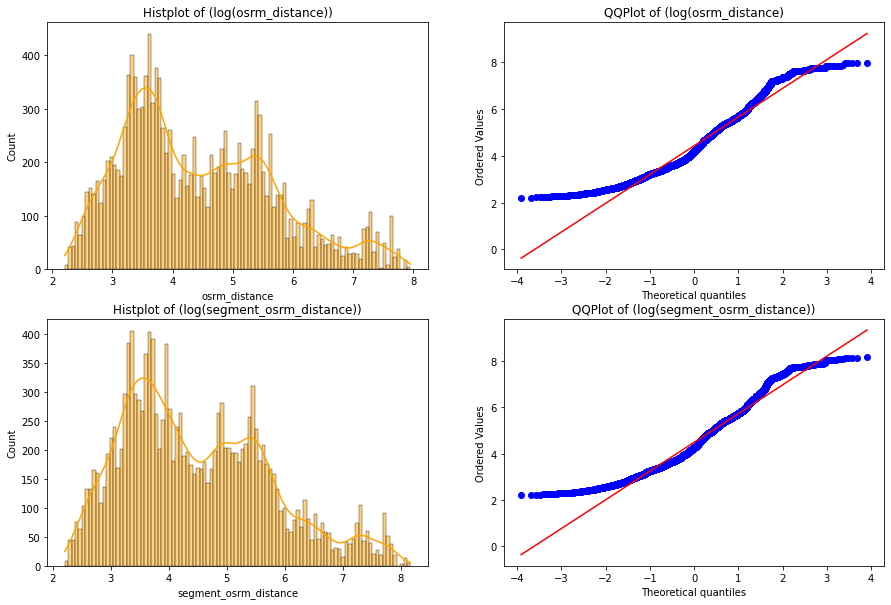

In [58]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
sns.histplot(hypo_4_1_log, bins=100, kde=True,color='orange')
plt.title('Histplot of (log(osrm_distance))')

ax = fig.add_subplot(222)
stats.probplot(hypo_4_1_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(osrm_distance)')

ax = fig.add_subplot(223)
sns.histplot(hypo_4_2_log, bins=100, kde=True,color='orange')
plt.title('Histplot of (log(segment_osrm_distance))')

ax = fig.add_subplot(224)
stats.probplot(hypo_4_2_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(segment_osrm_distance))')

__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.5.

__Step 4: Calculating the p_value__

In [59]:
for i in range(7):
    print(stats.ttest_ind(hypo_4_1_log.sample(10000) ,hypo_4_2_log.sample(10000)))
    print()

Ttest_indResult(statistic=-2.6312970294975018, pvalue=0.008512491081882024)

Ttest_indResult(statistic=-3.390070534335057, pvalue=0.0007000967305133168)

Ttest_indResult(statistic=-3.412649821526402, pvalue=0.0006446198367857917)

Ttest_indResult(statistic=-2.3562402481779614, pvalue=0.01847056641444246)

Ttest_indResult(statistic=-2.935561006273904, pvalue=0.00333324017812987)

Ttest_indResult(statistic=-2.9533242138716687, pvalue=0.0031473728680447375)

Ttest_indResult(statistic=-2.9219926595869796, pvalue=0.00348188911569483)



In [60]:
result = stats.kruskal(hypo_3_1_log.sample(5000),hypo_3_2_log.sample(5000))
result

KruskalResult(statistic=0.9594428313900416, pvalue=0.32732729594620286)

__Step 5: Conclusion__

Multiple t-tests have been done, as observed, p_value < the alpha or significance value.

Also, p_value of kurksal test > the alpha or significance value.

Hence, we fail to reject the null Hypothesis.

## Hypothesis 5
### Statement: HypothesisTesting between osrm time aggregated value and segment osrm time aggregated value

__Step 1: Defining the null and Altenate Hypothesis__

H0: actual_time and osrm_time have the same mean.

H1: actual_time and osrm_time does not have the same mean.

__Step 2: Selecting the appropriate test__

T-test is the appropriate test for this hypothesis because the standard deviation of the population of both the column is unknown.

This is a one-tailed test concerning two population means from two independent populations. 

As the population standard deviations are unknown, the two sample independent t-test will be the

appropriate test for this problem.

In [61]:
om_time =pd.DataFrame(df.groupby(['trip_uuid','od_duration_in_hrs'])['osrm_time'].max().reset_index())
om_time.head(4)

,trip_uuid,od_duration_in_hrs,osrm_time
0,trip-153671041653548748,16.658423,394.0
1,trip-153671041653548748,21.010074,349.0
2,trip-153671042288605164,0.980540,26.0
3,trip-153671042288605164,2.046325,42.0


In [62]:
hypo_5_1= pd.DataFrame(om_time.groupby('trip_uuid')['osrm_time'].sum().reset_index())
hypo_5_1.head(5)

,trip_uuid,osrm_time
0,trip-153671041653548748,743.0
1,trip-153671042288605164,68.0
2,trip-153671043369099517,1741.0
3,trip-153671046011330457,15.0
4,trip-153671052974046625,117.0


In [63]:
hypo_5_2= pd.DataFrame(df.groupby('trip_uuid')['segment_osrm_time'].sum().reset_index())
hypo_5_2.head(5)

,trip_uuid,segment_osrm_time
0,trip-153671041653548748,1008.0
1,trip-153671042288605164,65.0
2,trip-153671043369099517,1941.0
3,trip-153671046011330457,16.0
4,trip-153671052974046625,115.0


In [64]:
 hypo_5_1_log = np.log(hypo_5_1.osrm_time)
hypo_5_2_log = np.log(hypo_5_2.segment_osrm_time)

Text(0.5, 1.0, 'QQPlot of (log(segment_osrm_time))')

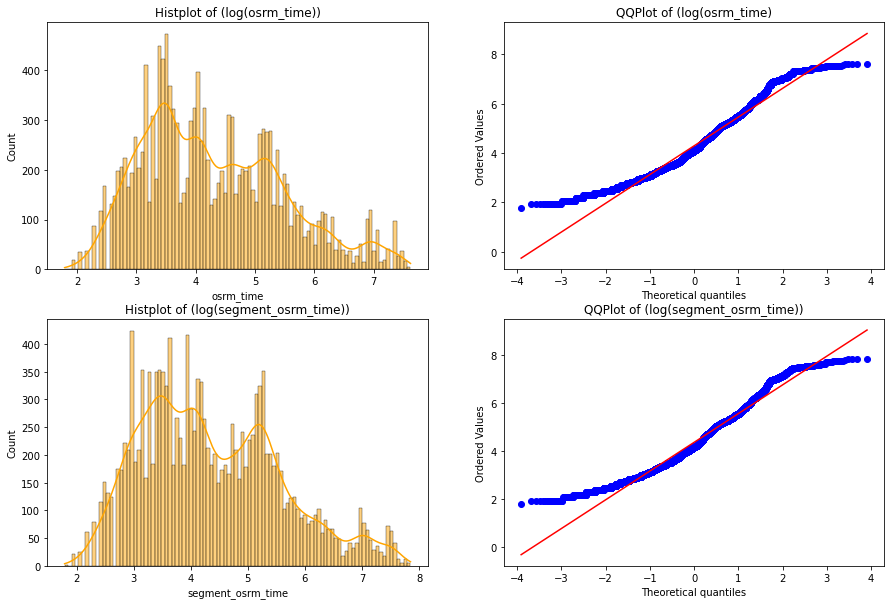

In [65]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
sns.histplot(hypo_5_1_log, bins=100, kde=True,color='orange')
plt.title('Histplot of (log(osrm_time))')

ax = fig.add_subplot(222)
stats.probplot(hypo_5_1_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(osrm_time)')

ax = fig.add_subplot(223)
sns.histplot(hypo_5_2_log, bins=100, kde=True,color='orange')
plt.title('Histplot of (log(segment_osrm_time))')

ax = fig.add_subplot(224)
stats.probplot(hypo_5_2_log, dist='norm', plot=plt)
plt.title('QQPlot of (log(segment_osrm_time))')

__Step 3: Defining the significance level__

The significance value, for this hypothesis would be 0.5.

__Step 4: Calculating the p_value__

In [66]:
for i in range(7):
    print(stats.ttest_ind(hypo_5_1_log.sample(10000) ,hypo_5_2_log.sample(10000)))
    print()

Ttest_indResult(statistic=-5.165018181164897, pvalue=2.427215520537411e-07)

Ttest_indResult(statistic=-3.9689886995039036, pvalue=7.243036502516549e-05)

Ttest_indResult(statistic=-3.4825775074181107, pvalue=0.0004976723055024382)

Ttest_indResult(statistic=-4.7250959432354245, pvalue=2.315704776851752e-06)

Ttest_indResult(statistic=-3.9875117157835662, pvalue=6.700723102752773e-05)

Ttest_indResult(statistic=-3.7611580373871334, pvalue=0.0001696105940372156)

Ttest_indResult(statistic=-4.711436200599903, pvalue=2.476308825977449e-06)



__Step 5: Conclusion__

Multiple t-tests have been done, as observed, p_value < the alpha or significance value.

Also, p_value of kurksal test > the alpha or significance value.

Hence, we fail to reject the null Hypothesis.